<a href="https://colab.research.google.com/github/2024S2-ML/.github/blob/main/inadimplencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving credit_risk_dataset.csv to credit_risk_dataset.csv


<ipython-input-1-06d730323001>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
<ipython-input-1-06d730323001>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

Acurácia: 0.9086445012787724

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      7613
           1       0.97      0.60      0.74      2162

    accuracy                           0.91      9775
   macro avg       0.94      0.80      0.84      9775
weighted avg       0.92      0.91      0.90      9775



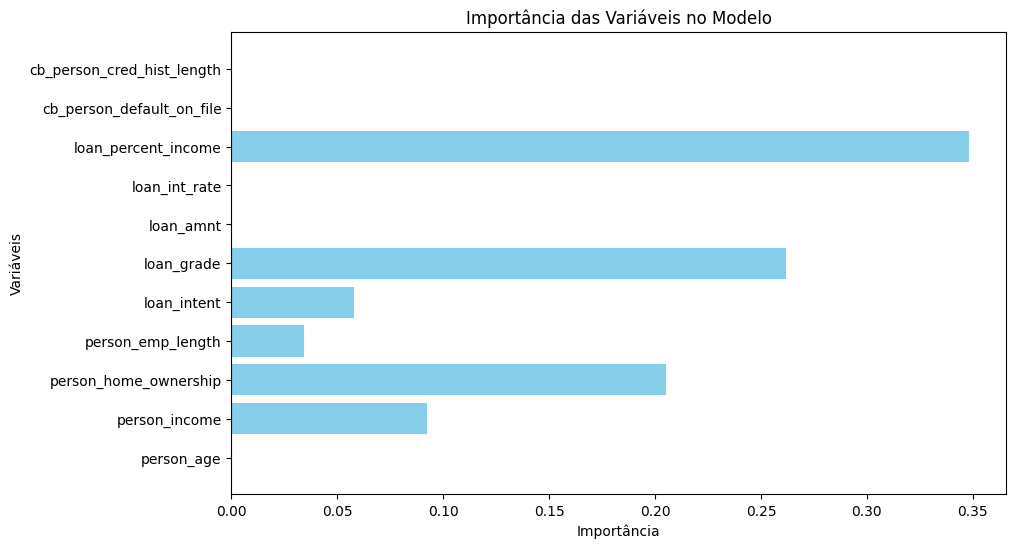

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Carregar os dados
# Substitua 'credit_risk_dataset.csv' pelo nome do arquivo que você carregou
data = pd.read_csv('credit_risk_dataset.csv')

# 1.1 Tratar valores ausentes
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True)

# 1.2 Codificar variáveis categóricas
label_encoders = {}
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Armazena para usar se precisarmos decodificar

# 1.3 Dividir em treinamento e teste
X = data.drop(columns=['loan_status'])  # Variáveis independentes
y = data['loan_status']  # Variável dependente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Treinar o modelo
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)  # Ajusta o modelo aos dados de treinamento

# 3. Fazer previsões
y_pred = decision_tree.predict(X_test)

# 4. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Exibir resultados
print("Acurácia:", accuracy)
print("\nRelatório de Classificação:\n", report)

# 5. Importância das variáveis
importances = decision_tree.feature_importances_
feature_names = X.columns

# Visualizar as importâncias em um gráfico
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis no Modelo')
plt.show()